# SIFT Detector and Descriptor


*   import three image datasets
*   implement corner detection algorithm to find keypoints (nameOfAlgo.detect())
*   report number of corners found
*   use .compute() function to compute descriptors




## import libraries and image dataset

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
import math

In [66]:
data_root = 'CS659_Data'
import os, shutil
if os.path.exists(data_root):
    shutil.rmtree(data_root)
os.mkdir(data_root)
!git clone https://github.com/Kenbo0601/CS659_Data.git

Cloning into 'CS659_Data'...
remote: Enumerating objects: 189, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 189 (delta 2), reused 25 (delta 1), pack-reused 163
Receiving objects: 100% (189/189), 8.72 MiB | 12.64 MiB/s, done.
Resolving deltas: 100% (2/2), done.


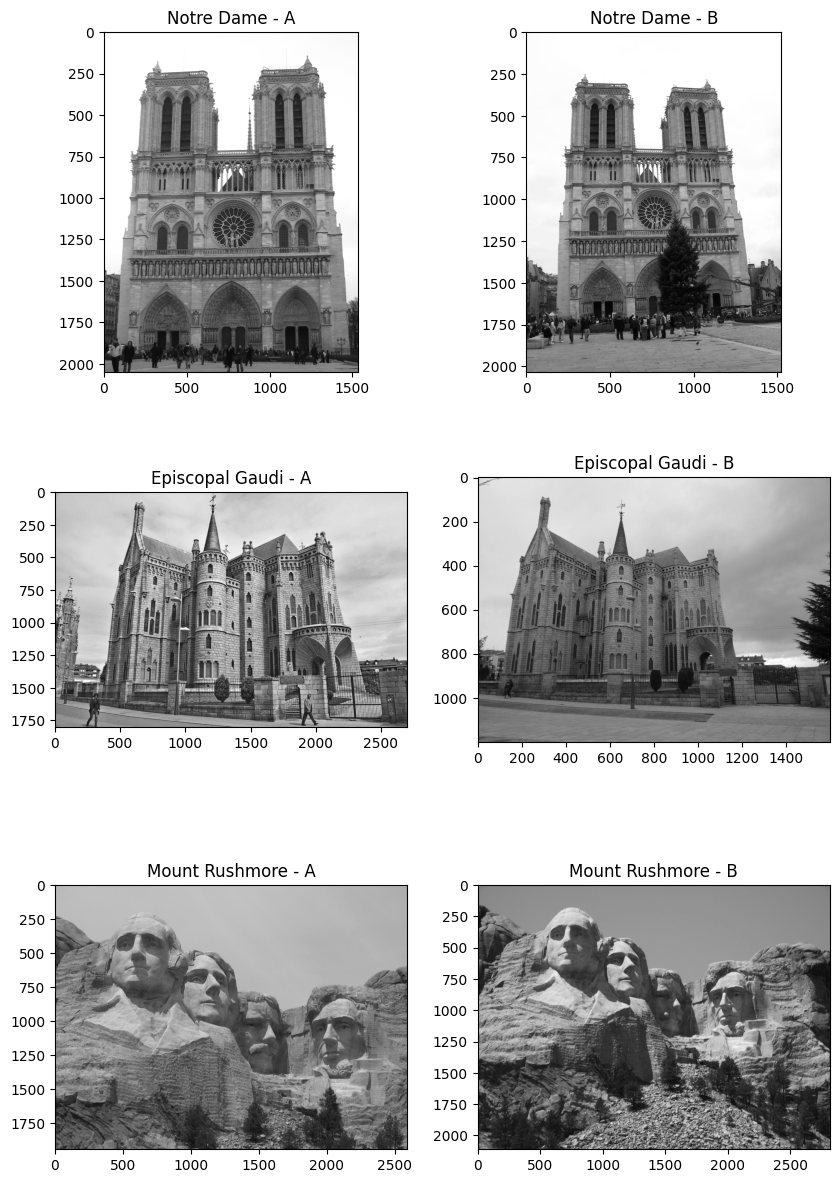

In [67]:
path = '/content/CS659_Data/project/'
ND_A = cv2.imread(path + 'Notre Dame/A.jpg')
ND_B = cv2.imread(path + 'Notre Dame/B.jpg')
EG_A = cv2.imread(path + 'Episcopal Gaudi/A.jpg')
EG_B = cv2.imread(path + 'Episcopal Gaudi/B.jpg')
MR_A = cv2.imread(path + 'Mount Rushmore/A.jpg')
MR_B = cv2.imread(path + 'Mount Rushmore/B.jpg')

# grayscale images
ND_A_gray = cv2.cvtColor(ND_A, cv2.COLOR_RGB2GRAY)
ND_B_gray = cv2.cvtColor(ND_B, cv2.COLOR_RGB2GRAY)
EG_A_gray = cv2.cvtColor(EG_A, cv2.COLOR_RGB2GRAY)
EG_B_gray = cv2.cvtColor(EG_B, cv2.COLOR_RGB2GRAY)
MR_A_gray = cv2.cvtColor(MR_A, cv2.COLOR_RGB2GRAY)
MR_B_gray = cv2.cvtColor(MR_B, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
plt.title("Notre Dame - A")
plt.imshow(ND_A_gray, cmap='gray')

plt.subplot(3,2,2)
plt.title("Notre Dame - B")
plt.imshow(ND_B_gray, cmap='gray')

plt.subplot(3,2,3)
plt.title("Episcopal Gaudi - A")
plt.imshow(EG_A_gray, cmap='gray')

plt.subplot(3,2,4)
plt.title("Episcopal Gaudi - B")
plt.imshow(EG_B_gray, cmap='gray')

plt.subplot(3,2,5)
plt.title("Mount Rushmore - A")
plt.imshow(MR_A_gray, cmap='gray')

plt.subplot(3,2,6)
plt.title("Mount Rushmore - B")
plt.imshow(MR_B_gray, cmap='gray')

plt.show()


## Implementation of SIFT



### Find keypoints and display images with keypoints

In [68]:
# create SIFT
sift = cv2.SIFT_create()

# use detect function to find corners
keypoints_ND_A = sift.detect(ND_A_gray, None)
keypoints_ND_B = sift.detect(ND_B_gray, None)
keypoints_EG_A = sift.detect(EG_A_gray, None)
keypoints_EG_B = sift.detect(EG_B_gray, None)
keypoints_MR_A = sift.detect(MR_B_gray, None)
keypoints_MR_B = sift.detect(MR_B_gray, None)

In [69]:
# print the number of keypoints found in each image
print("# of keypoints: Notre Dame - A: ", len(keypoints_ND_A))
print("# of keypoints: Notre Dame - B: ", len(keypoints_ND_B))
print("# of keypoints: Episcopal Gaudi - A: ", len(keypoints_EG_A))
print("# of keypoints: Episcopal Gaudi - B: ", len(keypoints_EG_B))
print("# of keypoints: Mount Rushmore - A: ", len(keypoints_MR_A))
print("# of keypoints: Mount Rushmore - B: ", len(keypoints_MR_B))

# of keypoints: Notre Dame - A:  24023
# of keypoints: Notre Dame - B:  20431
# of keypoints: Episcopal Gaudi - A:  73048
# of keypoints: Episcopal Gaudi - B:  8948
# of keypoints: Mount Rushmore - A:  30318
# of keypoints: Mount Rushmore - B:  30318


In [70]:
# now filter keypoints using threshold value
threshold = 0.0
filteredKp_ND_A = [kp for kp in keypoints_ND_A if kp.response > threshold]
filteredKp_ND_B = [kp for kp in keypoints_ND_B if kp.response > threshold]
filteredKp_EG_A = [kp for kp in keypoints_EG_A if kp.response > threshold]
filteredKp_EG_B = [kp for kp in keypoints_EG_B if kp.response > threshold]
filteredKp_MR_A = [kp for kp in keypoints_MR_A if kp.response > threshold]
filteredKp_MR_B = [kp for kp in keypoints_MR_B if kp.response > threshold]

print("Number of filtered keypoints: Notre Dame - A: ", len(filteredKp_ND_A))
print("Number of filtered keypoints: Notre Dame - B: ", len(filteredKp_ND_B))
print("Number of filtered keypoints: Episcopal Gaudi - A: ", len(filteredKp_EG_A))
print("Number of filtered keypoints: Episcopal Gaudi - B: ", len(filteredKp_EG_B))
print("Number of filtered keypoints: Mount Rushmore - A: ", len(filteredKp_MR_A))
print("Number of filtered keypoints: Mount Rushmore - B: ", len(filteredKp_MR_B))

Number of filtered keypoints: Notre Dame - A:  24023
Number of filtered keypoints: Notre Dame - B:  20431
Number of filtered keypoints: Episcopal Gaudi - A:  73048
Number of filtered keypoints: Episcopal Gaudi - B:  8948
Number of filtered keypoints: Mount Rushmore - A:  30318
Number of filtered keypoints: Mount Rushmore - B:  30318


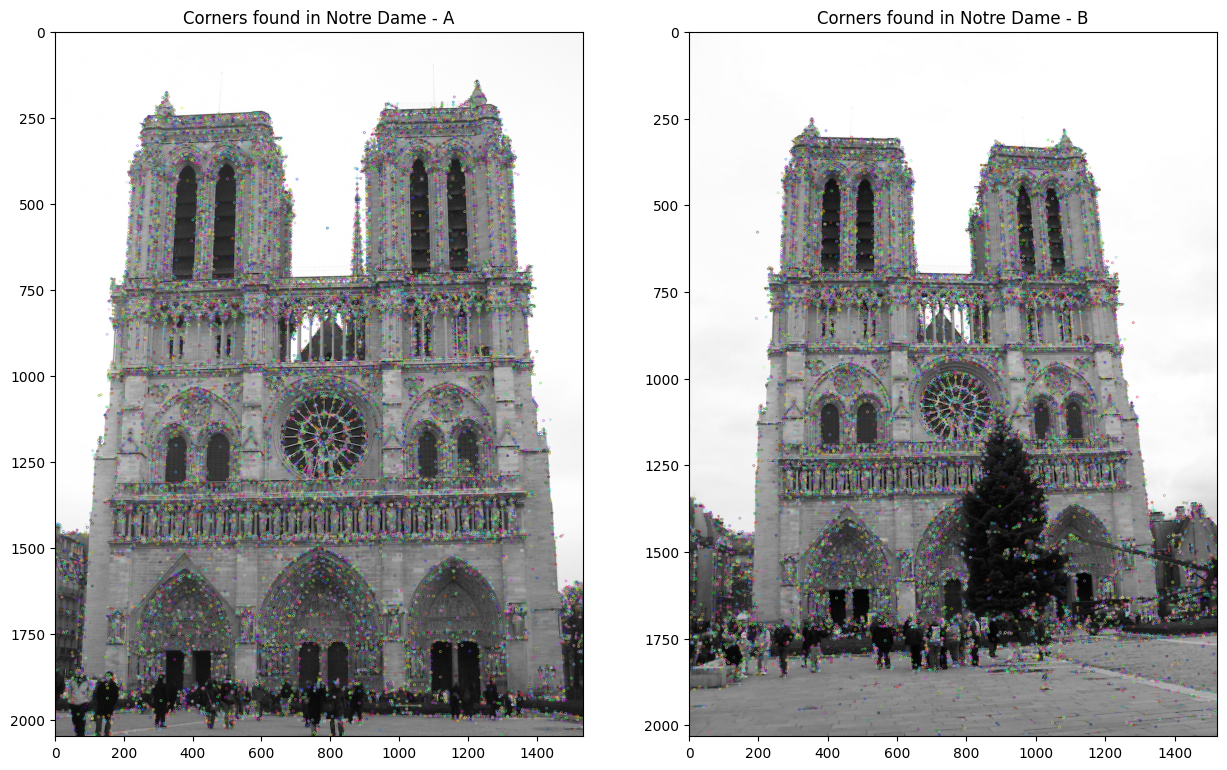

In [71]:
cornerImg_ND_A = cv2.drawKeypoints(ND_A_gray, filteredKp_ND_A, copy.deepcopy(ND_A))
cornerImg_ND_B = cv2.drawKeypoints(ND_B_gray, filteredKp_ND_B, copy.deepcopy(ND_B))

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Corners found in Notre Dame - A")
plt.imshow(cornerImg_ND_A)

plt.subplot(1,2,2)
plt.title("Corners found in Notre Dame - B")
plt.imshow(cornerImg_ND_B)

plt.show()

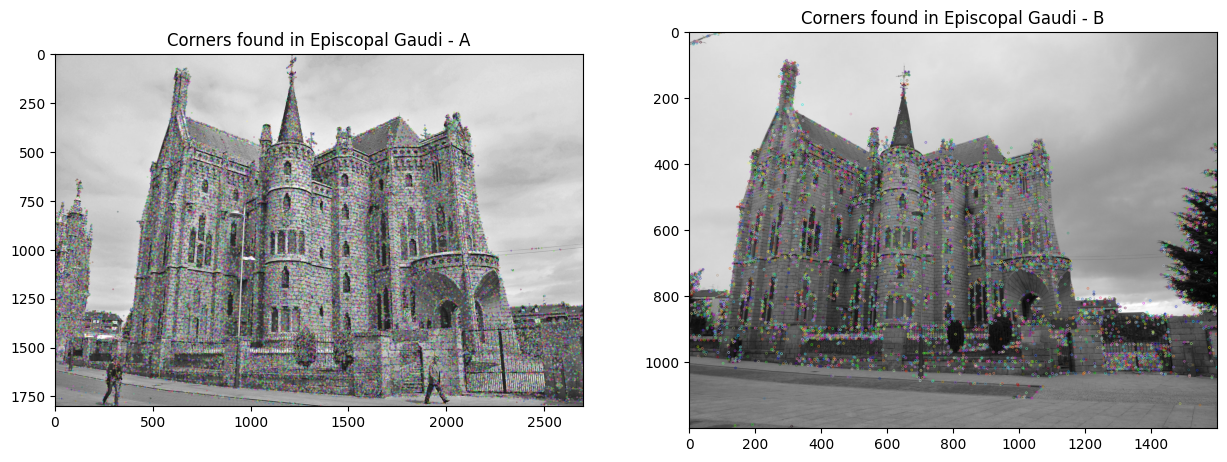

In [72]:
cornerImg_EG_A = cv2.drawKeypoints(EG_A_gray, filteredKp_EG_A, copy.deepcopy(EG_A))
cornerImg_EG_B = cv2.drawKeypoints(EG_B_gray, filteredKp_EG_B, copy.deepcopy(EG_B))

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Corners found in Episcopal Gaudi - A")
plt.imshow(cornerImg_EG_A)

plt.subplot(1,2,2)
plt.title("Corners found in Episcopal Gaudi - B")
plt.imshow(cornerImg_EG_B)

plt.show()

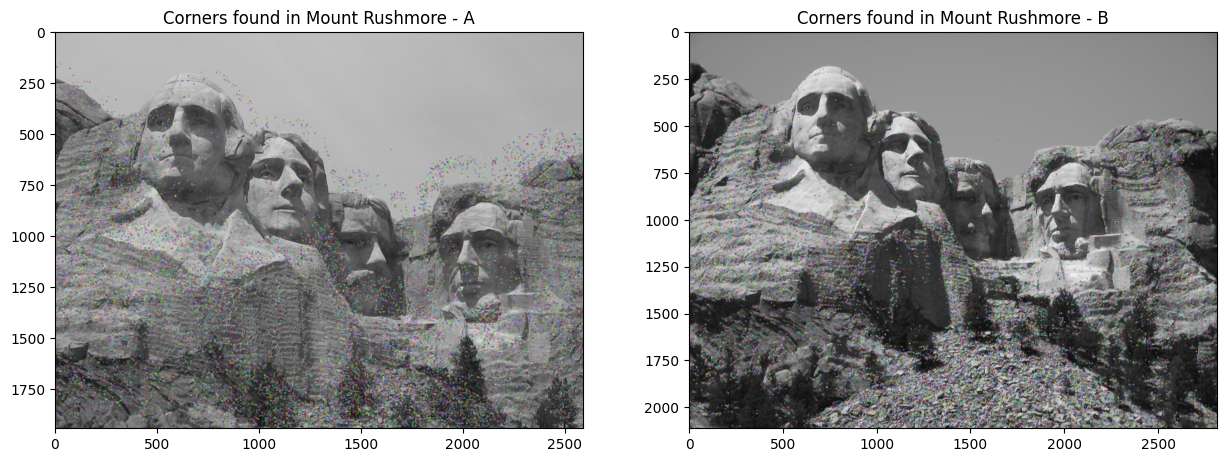

In [73]:
cornerImg_MR_A = cv2.drawKeypoints(MR_A_gray, filteredKp_MR_A, copy.deepcopy(MR_A))
cornerImg_MR_B = cv2.drawKeypoints(MR_B_gray, filteredKp_MR_B, copy.deepcopy(MR_B))

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Corners found in Mount Rushmore - A")
plt.imshow(cornerImg_MR_A)

plt.subplot(1,2,2)
plt.title("Corners found in Mount Rushmore - B")
plt.imshow(cornerImg_MR_B)

plt.show()

### Compute descriptors

In [74]:
# use compute function: pass keypoints

keypoints_ND_A, desc_ND_A = sift.compute(ND_A_gray, filteredKp_ND_A)
keypoints_ND_B, desc_ND_B = sift.compute(ND_B_gray, filteredKp_ND_B)
keypoints_EG_A, desc_EG_A = sift.compute(EG_A_gray, filteredKp_EG_A)
keypoints_EG_B, desc_EG_B = sift.compute(EG_B_gray, filteredKp_EG_B)
keypoints_MR_A, desc_MR_A = sift.compute(MR_A_gray, filteredKp_MR_A)
keypoints_MR_B, desc_MR_B = sift.compute(MR_B_gray, filteredKp_MR_B)

print(desc_ND_A.shape)

(24023, 128)


### Match two images

In [75]:
def find_goodMatches(matches):
  # Apply ratio test
  good_matches = []
  for m, n in matches:
      if m.distance < 0.75 * n.distance:
          good_matches.append(m)

  print("number of good matches: ", len(good_matches), "out of ", len(matches), "matches")
  return sorted(good_matches, key=lambda x: x.distance)

def ratio_test(matches):
  good_matches = []
  for x in matches:
    if x.distance < 0.75 * matches[1].distance:
      good_matches.append(x)
  print(len(good_matches), "/", len(matches), " = ", len(good_matches)/len(matches) * 100)
  return sorted(good_matches, key=lambda x: x.distance)


In [76]:
# create BFMatcher object
#bf = cv2.BFMatcher()

# match descriptors using knn
#matches_ND = bf.knnMatch(desc_ND_A, desc_ND_B, k=2)
#matches_EG = bf.knnMatch(desc_EG_A, desc_EG_B, k=2)
#matches_MR = bf.knnMatch(desc_MR_A, desc_MR_B, k=2)

#result_ND = find_goodMatches(matches_ND)
#result_EG = find_goodMatches(matches_EG)
#result_MR = find_goodMatches(matches_MR)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# match descriptors
matches_ND = bf.match(desc_ND_A, desc_ND_B)
matches_EG = bf.match(desc_EG_A, desc_EG_B)
matches_MR = bf.match(desc_MR_A, desc_MR_B)

result_ND = ratio_test(matches_ND)
result_EG = ratio_test(matches_EG)
result_MR = ratio_test(matches_MR)

4005 / 6637  =  60.343528702727134
649 / 4591  =  14.136353735569593
243 / 4612  =  5.268863833477884


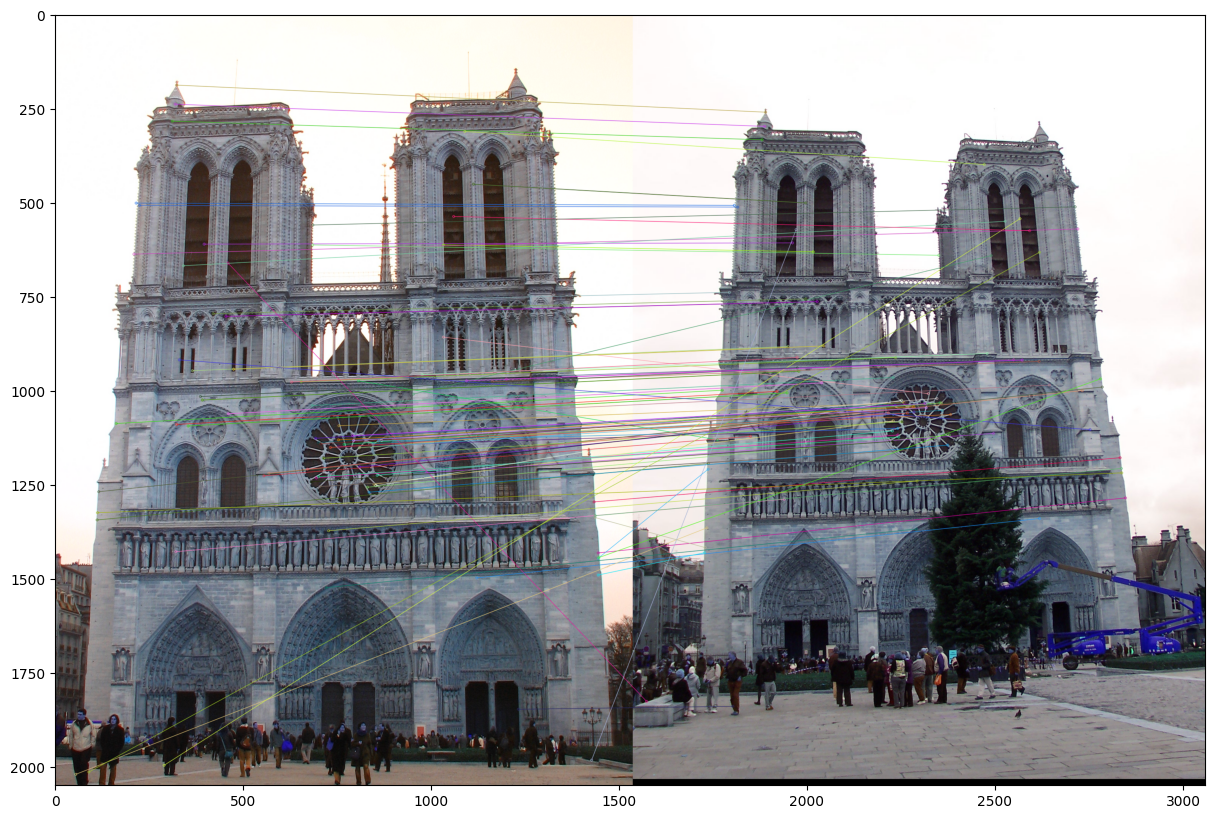

In [77]:

matched_image = cv2.drawMatches(ND_A, filteredKp_ND_A, ND_B, filteredKp_ND_B, result_ND[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15,10))
plt.imshow(matched_image)
plt.show()

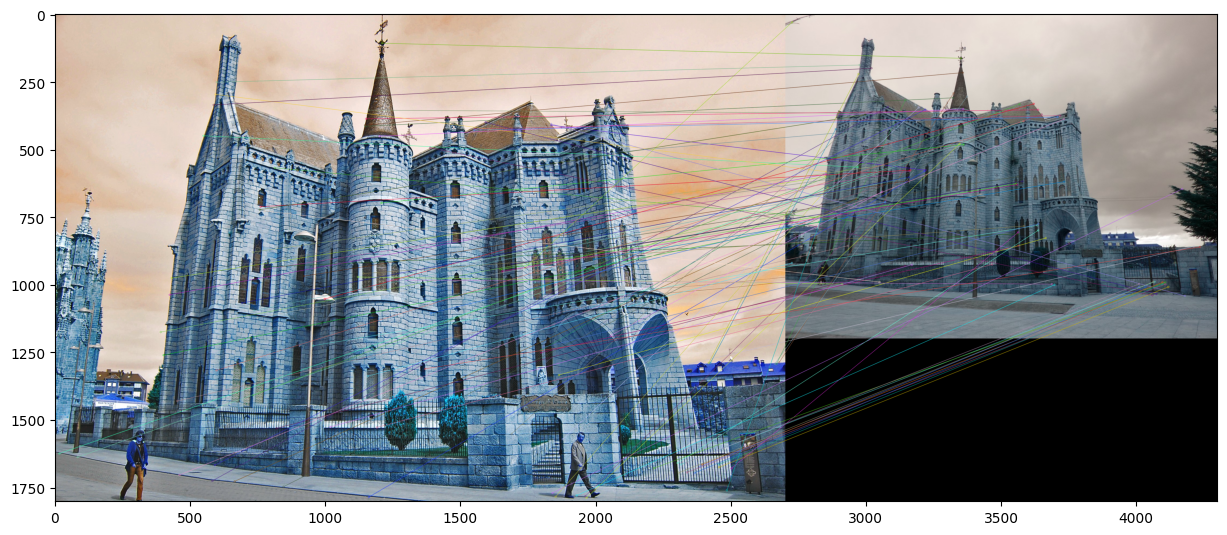

In [78]:
matched_image = cv2.drawMatches(EG_A, filteredKp_EG_A, EG_B, filteredKp_EG_B, result_EG[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15,10))
plt.imshow(matched_image)
plt.show()

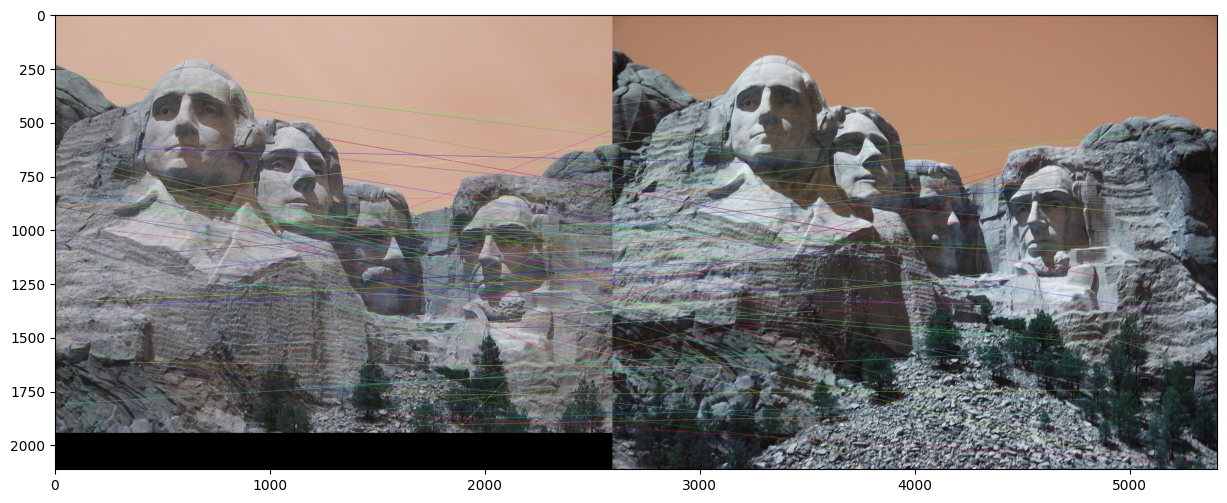

In [79]:
matched_image = cv2.drawMatches(MR_A, filteredKp_MR_A, MR_B, filteredKp_MR_B, result_MR[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15,10))
plt.imshow(matched_image)
plt.show()